In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\Assigment and Practice\Final att\Attrition.csv')
pd.options.display.max_columns = None 
pd.options.display.max_rows = None

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

# Checking for null

In [5]:
df.isnull().sum()#no null values in our data set

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# change object type feature into 1 2 3 etc (LabelEncoder)

In [6]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[df.select_dtypes(include=['object']).columns]
df[df.select_dtypes(include=['object']).columns]=df[df.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
df.shape

(1470, 35)

# Corelation

In [9]:
df['Over18'].value_counts()

0    1470
Name: Over18, dtype: int64

In [10]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [11]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [12]:
#dropping constant features
df.drop('Over18',inplace=True,axis=1)
df.drop('EmployeeCount',inplace=True,axis=1)
df.drop('StandardHours',inplace=True,axis=1)

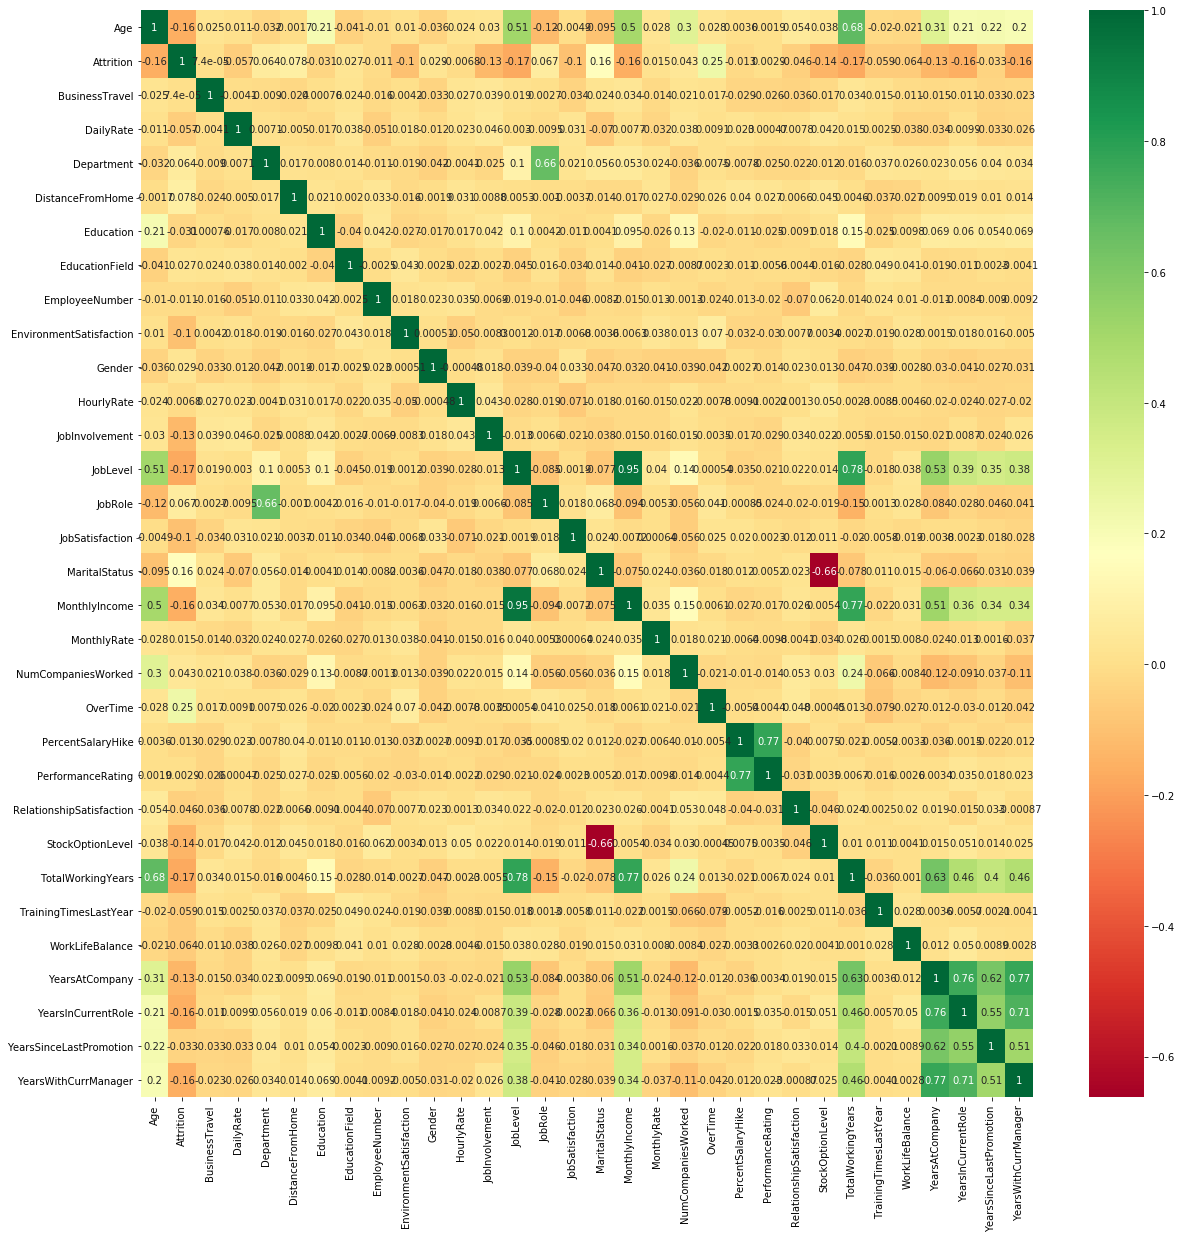

In [13]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
#self created function for multi collinearinty
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
#corrilation value more than .9 between 2 independent variabel
corr_features = correlation(df, .9)
len(set(corr_features))

1

In [16]:
corr_features

{'MonthlyIncome'}

In [17]:
df.drop(corr_features,axis=1,inplace=True);

# Visualization

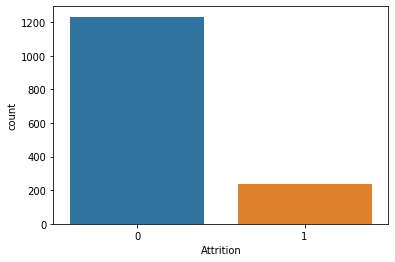

In [18]:
sns.countplot(x='Attrition',data=df)#there is class imbalance problame

# Train Test split

In [19]:
df_x  = df.iloc[ : , ]
df_y=df['Attrition']
df_x.drop('Attrition',inplace=True,axis=1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.1,random_state=16)

# over sampling for class imbalance

In [21]:
from collections import Counter
Counter(y_train)

Counter({0: 1107, 1: 216})

In [22]:
from collections import Counter
Counter(y_test)

Counter({0: 126, 1: 21})

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [61]:
ns=RandomOverSampler(.8)
df_x_train_ns,df_y_train_ns=ns.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(df_y_train_ns)))

The number of classes before fit Counter({0: 1107, 1: 216})
The number of classes after fit Counter({0: 1107, 1: 885})


# standarize data

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df_x_train_ns)
X_train_std = sc.transform(df_x_train_ns)
X_test_std = sc.transform(x_test)

# SVM

In [27]:
from sklearn import svm
clf_svm_l = svm.SVC(kernel='linear', C=100)
clf_svm_l.fit(X_train_std, df_y_train_ns)

SVC(C=100, kernel='linear')

In [28]:
y_test_pred = clf_svm_l.predict(X_test_std)
print(confusion_matrix(y_test_pred,y_test))
print(accuracy_score(y_test_pred,y_test))
print(classification_report(y_test_pred,y_test))

[[102   5]
 [ 24  16]]
0.8027210884353742
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       107
           1       0.76      0.40      0.52        40

    accuracy                           0.80       147
   macro avg       0.79      0.68      0.70       147
weighted avg       0.80      0.80      0.78       147



In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [30]:
pred_value   =  clf_svm_l.predict(X_test_std)
log_roc_auc  = roc_auc_score(pred_value ,y_test)
log_roc_auc  

0.6766355140186916

# Decision Tree

In [37]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [38]:
from sklearn.ensemble import BaggingClassifier

In [39]:
bag_clf = BaggingClassifier(base_estimator=clftree, bootstrap=True, n_jobs=-1,
                            random_state=42)

In [40]:
bag_clf.fit(df_x_train_ns,df_y_train_ns)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_jobs=-1,
                  random_state=42)

In [41]:
y_test_pred = bag_clf.predict(x_test)
print(confusion_matrix(y_test_pred,y_test))
print(accuracy_score(y_test_pred,y_test))
print(classification_report(y_test_pred,y_test))

[[118  14]
 [  8   7]]
0.8503401360544217
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       132
           1       0.33      0.47      0.39        15

    accuracy                           0.85       147
   macro avg       0.63      0.68      0.65       147
weighted avg       0.87      0.85      0.86       147



In [42]:
pred_value   =  bag_clf.predict(x_test)
log_roc_auc  = roc_auc_score(pred_value ,y_test)
log_roc_auc  

0.6803030303030303

# Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbc_clf = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 3)
gbc_clf.fit(df_x_train_ns,df_y_train_ns)

GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000)

In [45]:
y_test_pred = gbc_clf.predict(x_test)
print(confusion_matrix(y_test_pred,y_test))
print(accuracy_score(y_test_pred,y_test))
print(classification_report(y_test_pred,y_test))

[[115  10]
 [ 11  11]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       125
           1       0.52      0.50      0.51        22

    accuracy                           0.86       147
   macro avg       0.72      0.71      0.71       147
weighted avg       0.85      0.86      0.86       147



In [46]:
pred_value   =  gbc_clf.predict(x_test)
log_roc_auc  = roc_auc_score(pred_value ,y_test)
log_roc_auc  

0.7100000000000001

# Ada Boost

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [49]:
ada_clf.fit(df_x_train_ns,df_y_train_ns)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [50]:
y_test_pred = ada_clf.predict(x_test)
print(confusion_matrix(y_test_pred,y_test))
print(accuracy_score(y_test_pred,y_test))
print(classification_report(y_test_pred,y_test))

[[112   9]
 [ 14  12]]
0.8435374149659864
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       121
           1       0.57      0.46      0.51        26

    accuracy                           0.84       147
   macro avg       0.73      0.69      0.71       147
weighted avg       0.83      0.84      0.84       147



In [51]:
pred_value   =  ada_clf.predict(x_test)
log_roc_auc  = roc_auc_score(pred_value ,y_test)
log_roc_auc  

0.6935791481246028

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [54]:
rf_clf.fit(df_x_train_ns,df_y_train_ns)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [55]:
y_test_pred = rf_clf.predict(x_test)
print(confusion_matrix(y_test_pred,y_test))
print(accuracy_score(y_test_pred,y_test))
print(classification_report(y_test_pred,y_test))

[[125  18]
 [  1   3]]
0.8707482993197279
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       143
           1       0.14      0.75      0.24         4

    accuracy                           0.87       147
   macro avg       0.57      0.81      0.58       147
weighted avg       0.97      0.87      0.91       147



In [56]:
pred_value   =  rf_clf.predict(x_test)
log_roc_auc  = roc_auc_score(pred_value ,y_test)
log_roc_auc  

0.8120629370629371

In [57]:
print('SVM  ACCURACY,PRECISION,AREA UNDER ROC are ',.80,.76,.67)
print('Decission ACCURACY,PRECISION,AREA UNDER ROC are ',.85,.33,.68)
print('Gradient Boosting ACCURACY,PRECISION,AREA UNDER ROC are ',.85,.52,.71)
print('Ada Boosting ACCURACY,PRECISION,AREA UNDER ROC are ',.84,.57,.69)
print('Random forest ACCURACY,PRECISION,AREA UNDER ROC are ',.87,.14,.81)

SVM  ACCURACY,PRECISION,AREA UNDER ROC are  0.8 0.76 0.67
Decission ACCURACY,PRECISION,AREA UNDER ROC are  0.85 0.33 0.68
Gradient Boosting ACCURACY,PRECISION,AREA UNDER ROC are  0.85 0.52 0.71
Ada Boosting ACCURACY,PRECISION,AREA UNDER ROC are  0.84 0.57 0.69
Random forest ACCURACY,PRECISION,AREA UNDER ROC are  0.87 0.14 0.81


In [58]:
#in this prolem our main focous should be GOOD PRECISION FOR 1(IMPORTANT) and GOOD accuracy thats why we choose SVM algorithum

# FINAL MODEL

In [62]:
from sklearn import svm
clf_svm_l = svm.SVC(kernel='linear', C=100)
clf_svm_l.fit(X_train_std, df_y_train_ns)

SVC(C=100, kernel='linear')

In [63]:
y_test_pred = clf_svm_l.predict(X_test_std)
print(confusion_matrix(y_test_pred,y_test))
print(accuracy_score(y_test_pred,y_test))
print(classification_report(y_test_pred,y_test))

[[102   5]
 [ 24  16]]
0.8027210884353742
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       107
           1       0.76      0.40      0.52        40

    accuracy                           0.80       147
   macro avg       0.79      0.68      0.70       147
weighted avg       0.80      0.80      0.78       147



In [64]:
pred_value   =  clf_svm_l.predict(X_test_std)
log_roc_auc  = roc_auc_score(pred_value ,y_test)
log_roc_auc  

0.6766355140186916

In [ ]:
clf_svm_